In [1]:
pip install quandl

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import quandl

In [ ]:
quandl.ApiConfig.api_key = 'e2_nufGGoKaFahocoy9B'
data = quandl.get_table('WIKI/PRICES', ticker = ['FB', 'AAPL', 'AMZN', 'MSFT', 'GOOGL'], 
                       qopts = { 'columns': ['ticker', 'date', 'adj_close'] },
                        date = { 'gte': '2012-6-1', 'lte': '2018-1-1' },
                       paginate = True)

In [ ]:
data.head()

,ticker,date,adj_close
None,,,
0,MSFT,2017-12-29,85.54
1,MSFT,2017-12-28,85.72
2,MSFT,2017-12-27,85.71
3,MSFT,2017-12-26,85.40
4,MSFT,2017-12-22,85.51


In [ ]:
data.tail()

,ticker,date,adj_close
None,,,
7013,AAPL,2012-06-07,73.473988
7014,AAPL,2012-06-06,73.440575
7015,AAPL,2012-06-05,72.331500
7016,AAPL,2012-06-04,72.519130
7017,AAPL,2012-06-01,72.095034


In [ ]:
new_data = data.set_index('date')

In [ ]:
stocks = new_data.pivot(columns = 'ticker')

In [ ]:
np.random.seed(101)

In [ ]:
stocks.head()

adj_close                                       
ticker           AAPL    AMZN      FB       GOOGL       MSFT
date                                                        
2012-06-01  72.095034  208.22  27.720  286.374009  24.548774
2012-06-04  72.519130  214.57  26.900  290.190791  24.635062
2012-06-05  72.331500  213.21  25.869  286.088127  24.596233
2012-06-06  73.440575  217.64  26.810  291.183857  25.325361
2012-06-07  73.473988  218.80  26.310  290.010234  25.221816

In [ ]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

adj_close                                        
ticker          AAPL      AMZN        FB     GOOGL      MSFT
date                                                        
2012-06-01       NaN       NaN       NaN       NaN       NaN
2012-06-04  0.005865  0.030041 -0.030028  0.013240  0.003509
2012-06-05 -0.002591 -0.006358 -0.039081 -0.014239 -0.001577
2012-06-06  0.015217  0.020565  0.035730  0.017655  0.029213
2012-06-07  0.000455  0.005316 -0.018826 -0.004039 -0.004097

In [ ]:
ports = 5000
#create array of zeros of 5000 cross 5 for weights of stocks, returns volatility and sharpe ratio
all_weights = np.zeros((ports, len(stocks.columns)))
ret_arr = np.zeros(ports)
vol_arr = np.zeros(ports)
sharpe_arr = np.zeros(ports)

for x in range(ports):
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    # Save weights
    all_weights[x,:] = weights
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
    




In [ ]:
print('Maximum sharpe ratio: ', sharpe_arr.max())

Maximum sharpe ratio:  1.3882556127952697


In [ ]:
print('Maximum sharpe ratio location in array: ', sharpe_arr.argmax())

Maximum sharpe ratio location in array:  726


In [ ]:
#get the weight allocation at this location
print(all_weights[726,:])

[0.02103338 0.22647537 0.20671655 0.23615047 0.30962422]


In [ ]:
max_sr_ret = ret_arr[726]
max_sr_vol = vol_arr[726]

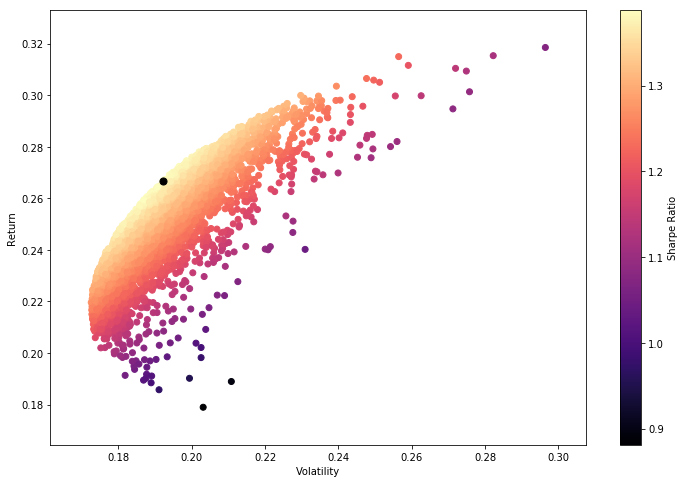

In [ ]:
#plot the graph of return vs volatility and pointout maximum sharpe ratio
pyplot.figure(figsize=(12,8))
pyplot.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='magma')
pyplot.colorbar(label='Sharpe Ratio')
pyplot.xlabel('Volatility')
pyplot.ylabel('Return')
pyplot.scatter(max_sr_vol, max_sr_ret,c='black', s=50) # red dot
pyplot.show()

In [ ]:

def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])


def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1
